In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
df=pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [58]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [59]:
df.drop(columns=['Booking_ID'], inplace=True)

In [60]:
df.shape

(29020, 18)

In [61]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(7661)

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.shape

(21359, 18)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [66]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [67]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [68]:
df['required_car_parking_space']=df['required_car_parking_space'].astype(str)
df['repeated_guest']=df['repeated_guest'].astype(str)

In [71]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']
Numerical Columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [72]:
## DATA ANALYSIS

In [73]:
data=df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [ ]:
##### UNIVARIATE ANALYSIS

In [ ]:
def num_plot_dist(df,num_features):
    fig,axes=plt.subplots(len(num_features),2,figsize=(15,5*len(num_features)))
    if len(num_features)==1:
        axes=[axes]
    for i,column in enumerate(num_features):
        sns.histplot(data=df,x=column,ax=axes[i][0],kde=True,palette='viridis')
        axes[i][0].set_title(f'Histogram of {column}')

        sns.boxplot(data=df,x=column,ax=axes[i][1],palette="viridis")
        axes[i][1].set_title(f'Boxplot for {column}')

    plt.tight_layout()
    plt.show()


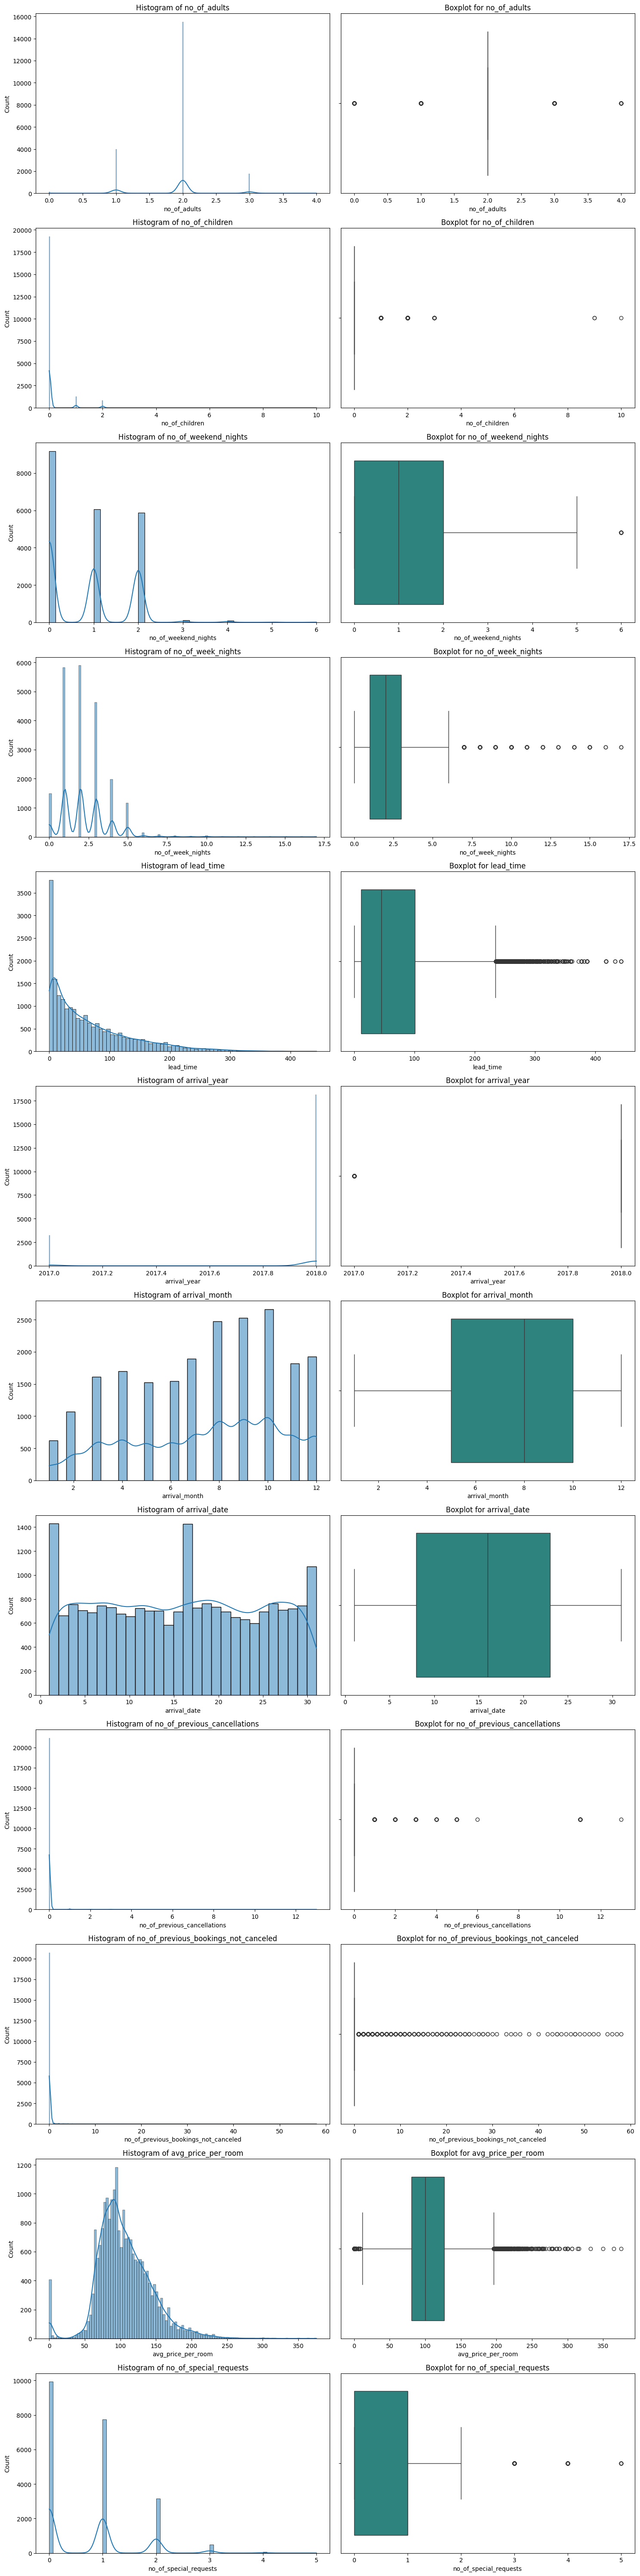

In [ ]:
num_plot_dist(data,num_cols)

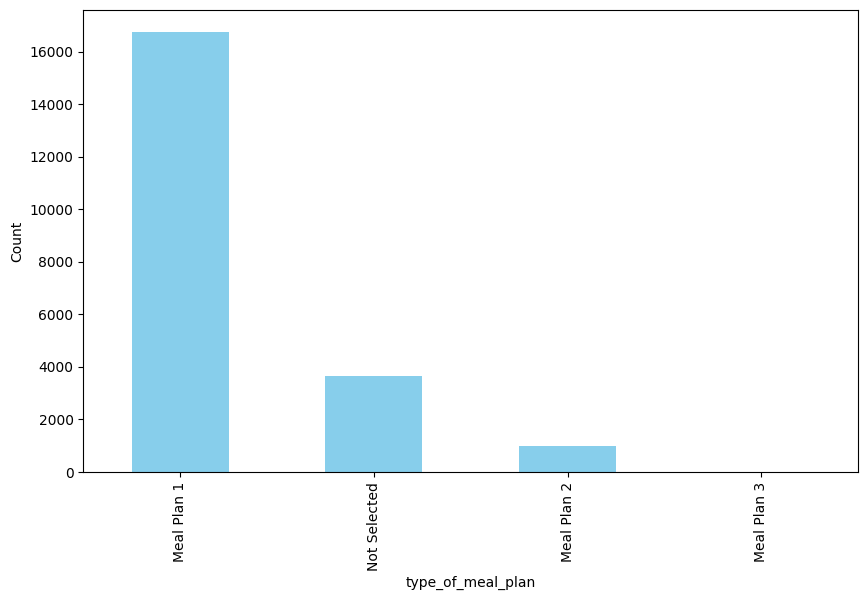

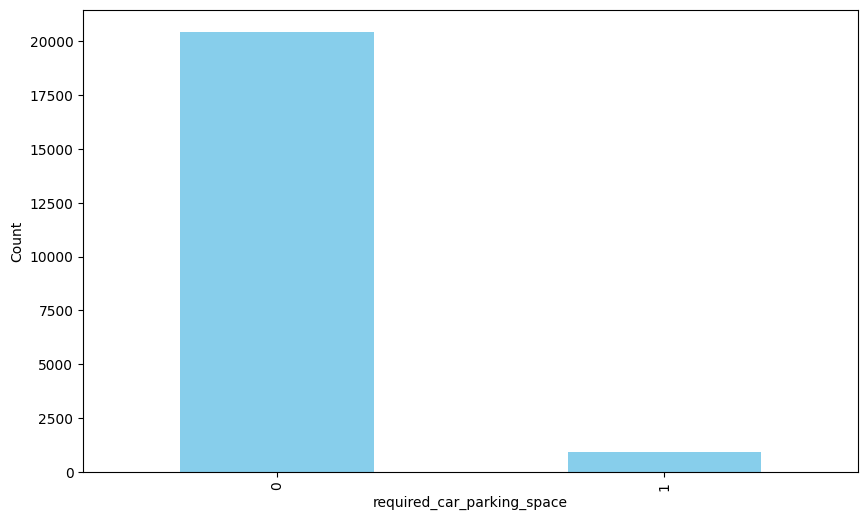

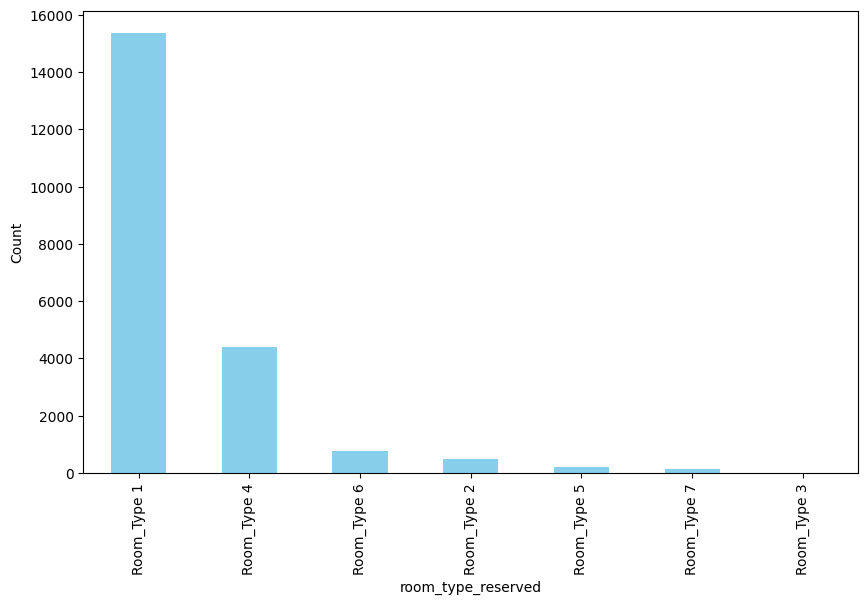

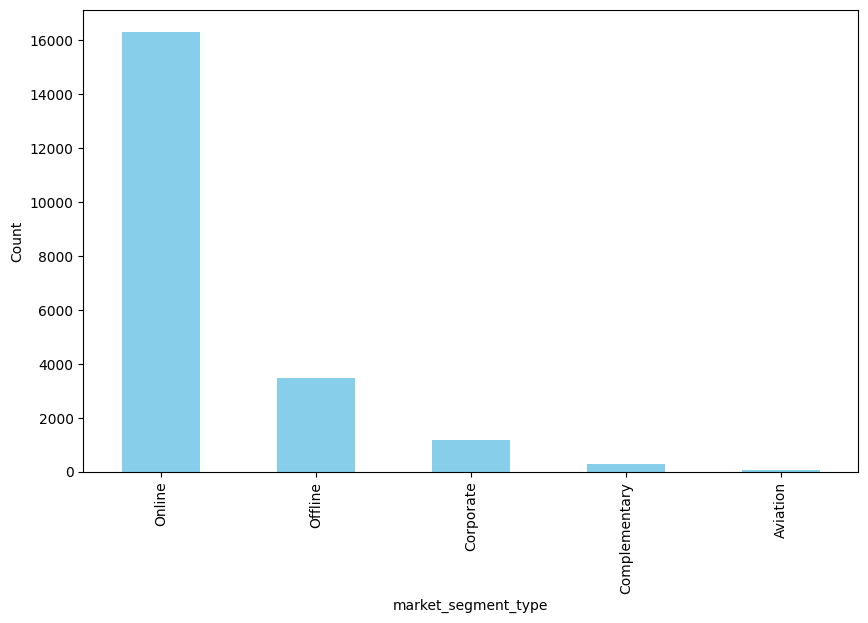

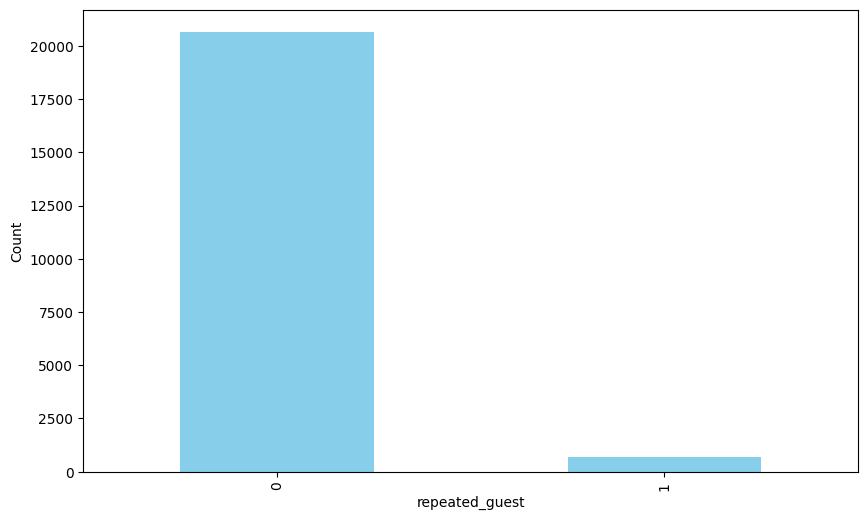

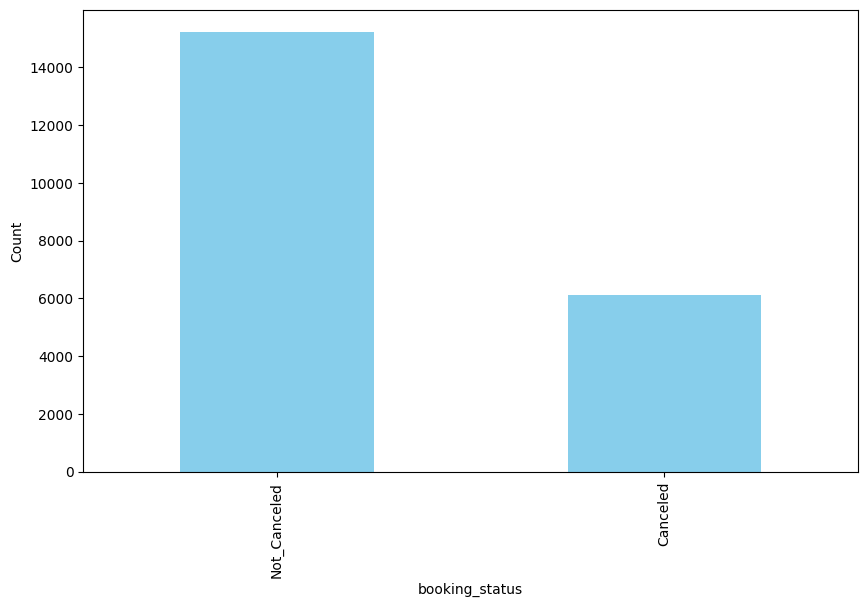

In [ ]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

In [74]:
data['booking_status'].value_counts()
# it reflects the data is highly imbalanced

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [ ]:
#### BIVARIATE ANALYSIS 

In [ ]:
def plot_bivariate_num(df,target,num_features):
    num_plot=len(num_features)
    num_rows=(num_plot+1)//2
    fig,axes=plt.subplots(num_rows,2,figsize=(15,5*num_rows))
    axes=axes.flatten()


    for i,column in enumerate(num_features):
        sns.boxplot(data=df,x=target,y=column, ax=axes[i],palette='Blues')
        axes[i].set_title(f'Boxplot of {column} vs {target}')

    plt.tight_layout()
    plt.show()

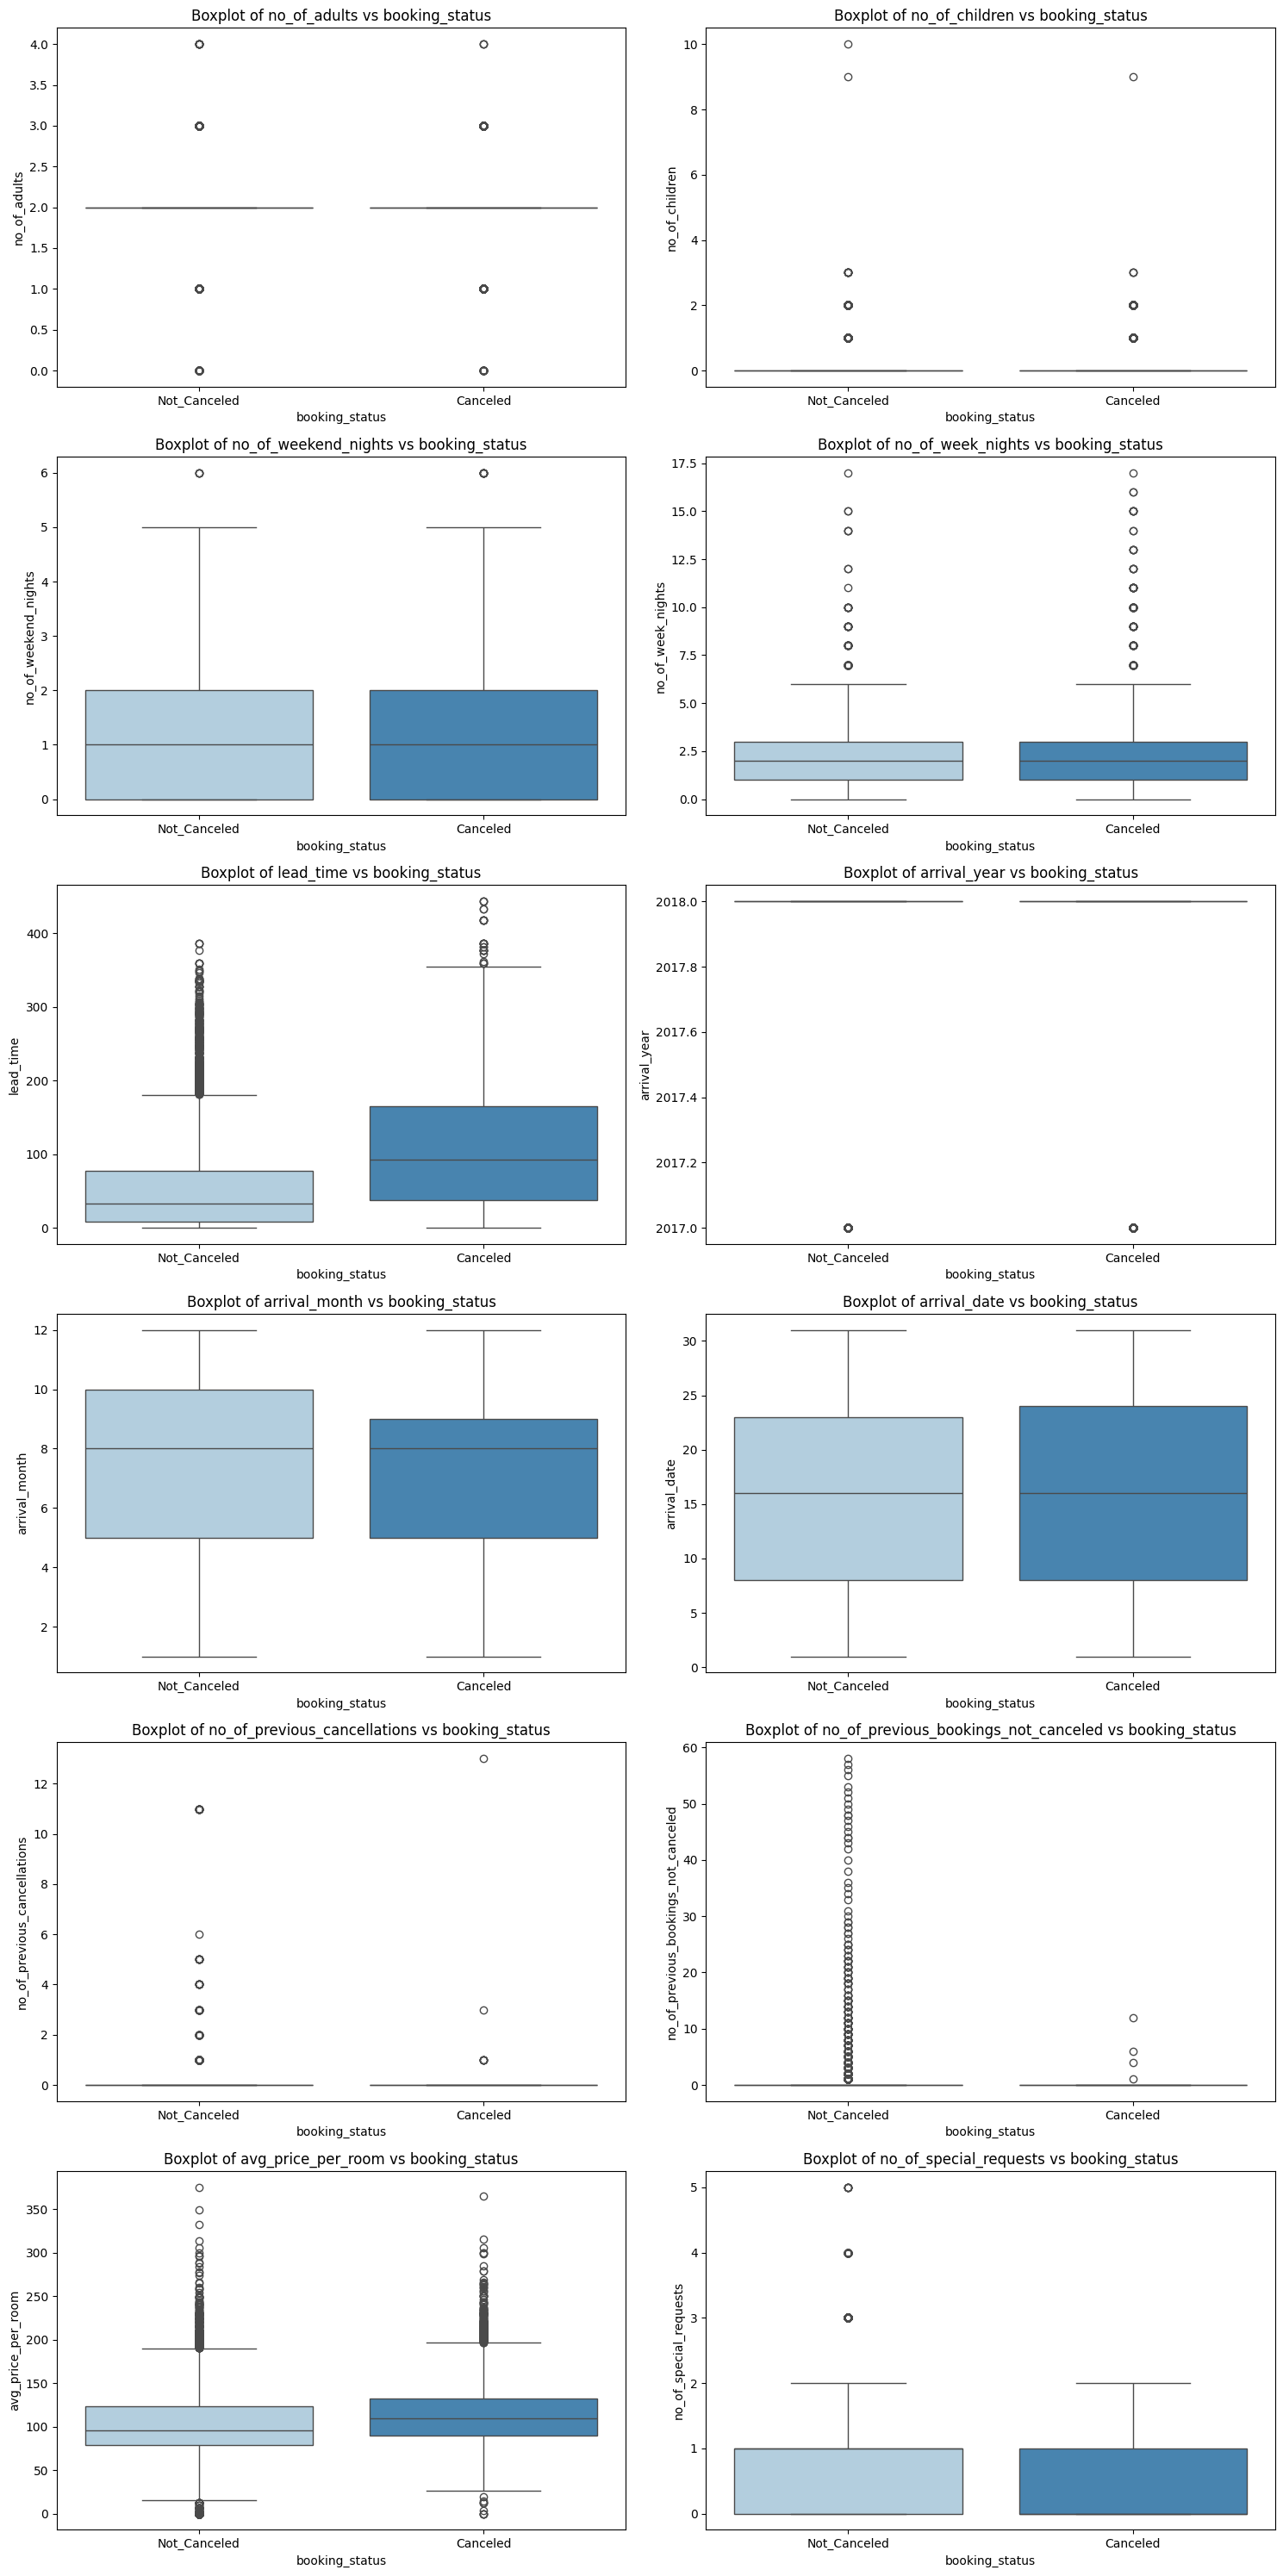

In [ ]:
plot_bivariate_num(data,'booking_status',num_cols)

In [ ]:
# it is found that the lead time is the most significant feature that affects the booking status.

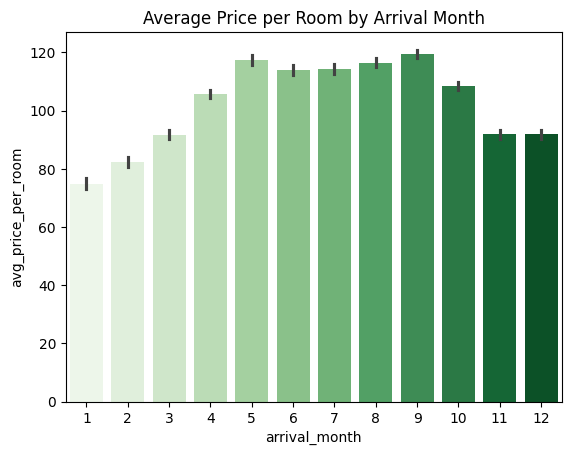

In [ ]:
sns.barplot(data=data,x='arrival_month',y='avg_price_per_room',palette='Greens')
plt.title('Average Price per Room by Arrival Month')
plt.show()

In [ ]:
def plot_bivariate_cat(df,target,cat_features):
   num_features=len(cat_features)
   num_rows=(num_features+1)//2
   fig,axes=plt.subplots(num_rows,2,figsize=(15,5*num_rows))
   axes=axes.flatten()

   for i,feature in enumerate(cat_features):
       sns.countplot(data=df,x=feature,hue=target,ax=axes[i],palette='Set2')
       axes[i].set_title(f'Countplot of {feature} vs {target}')
       axes[i].tick_params(axis='x', rotation=45)

   plt.tight_layout()
   plt.show()

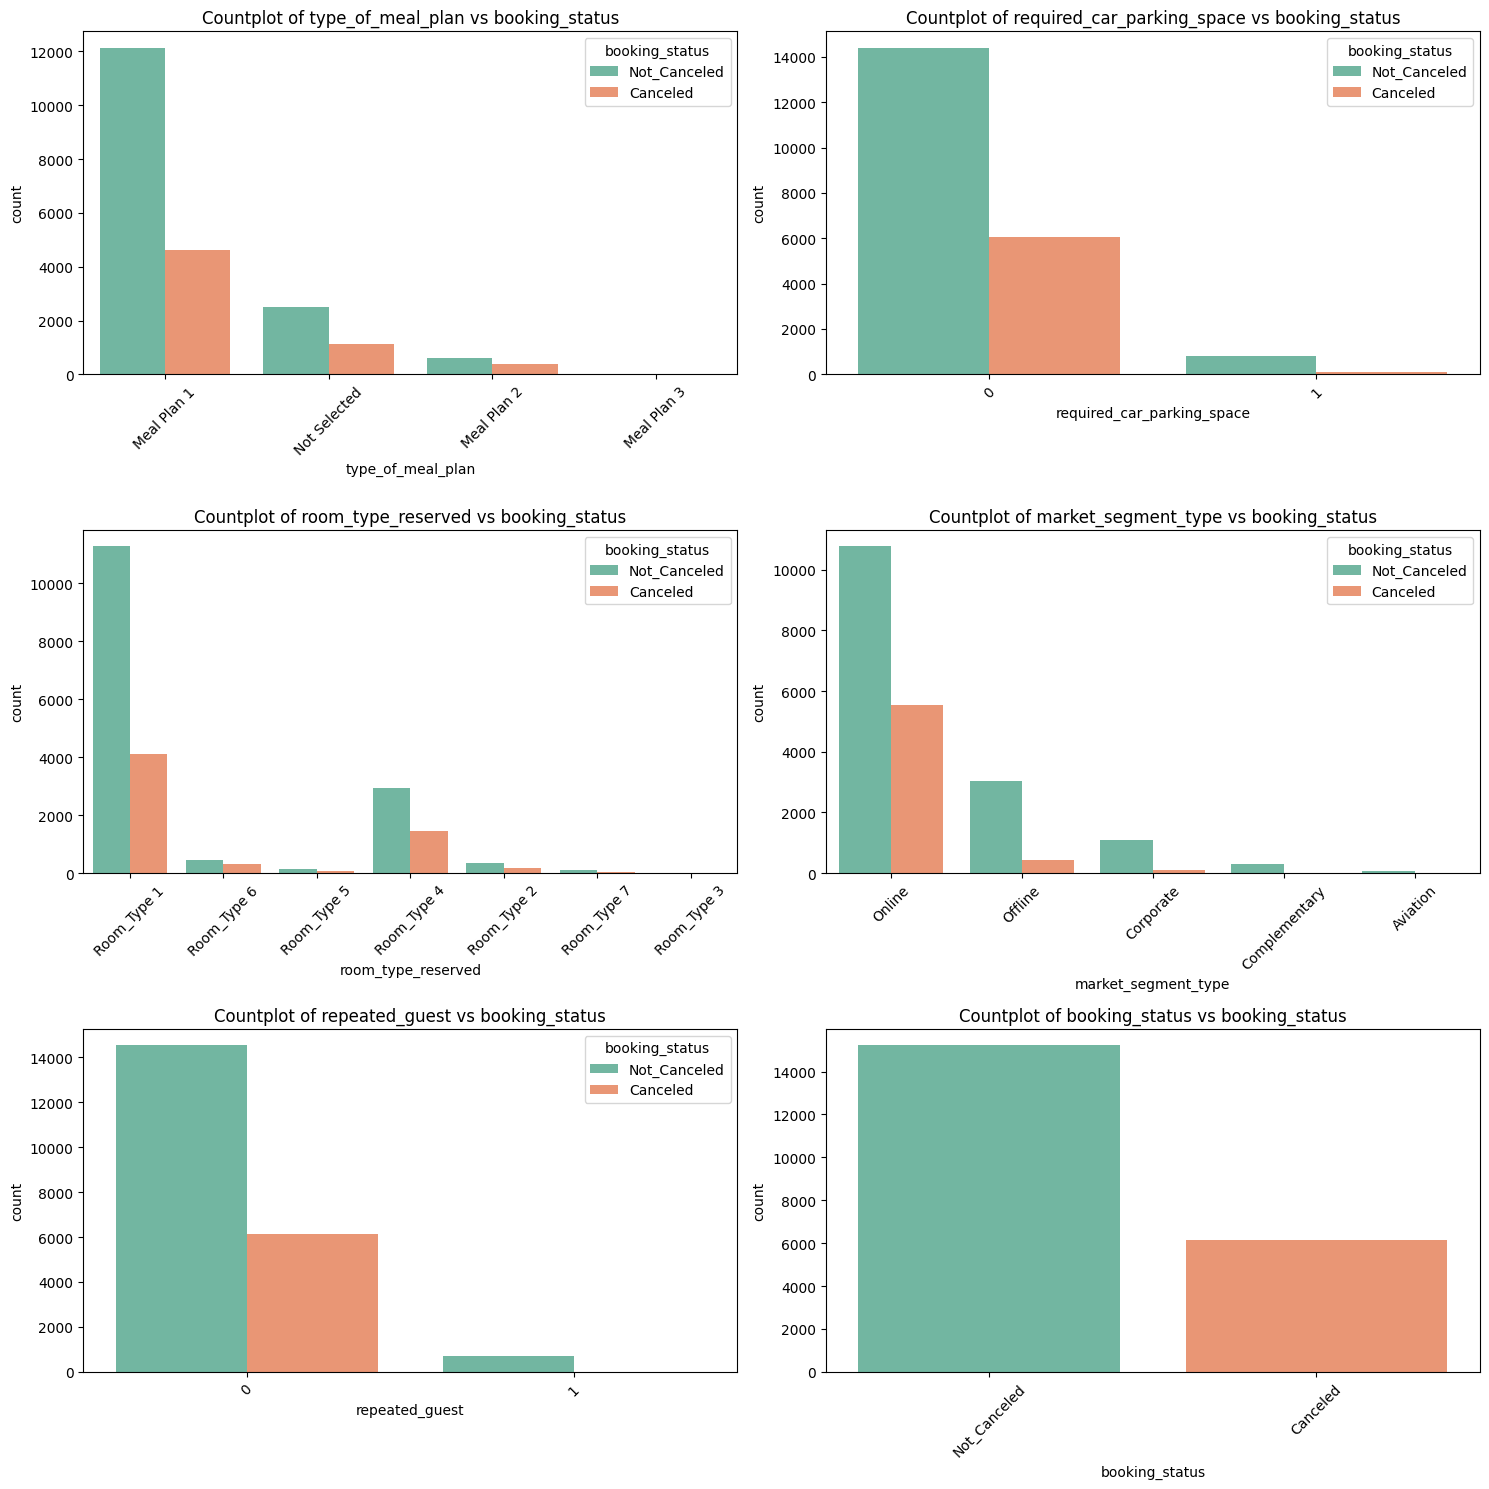

In [ ]:
plot_bivariate_cat(data,'booking_status',cat_cols)

In [ ]:
#### DATA PREPROCESSING

In [75]:
### Label Encoding
from sklearn.preprocessing import LabelEncoder

In [76]:
label_encoder=LabelEncoder()

mapping={}
for col in cat_cols:
    data[col]=label_encoder.fit_transform(data[col])
    mapping[col]={label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}
    #mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [77]:
for l, col in mapping.items():
    print(f"{l}: {col}")

type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space: {'0': np.int64(0), '1': np.int64(1)}
room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest: {'0': np.int64(0), '1': np.int64(1)}
booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [79]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [82]:
### Multicollinearity Check

In [83]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.6 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 6.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.6 MB 7.3 MB/s eta 0:00:01
   -------------------------- ------------- 6.3/9.6 MB 7.5 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.6 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.6 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 4.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ----

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [86]:
X= add_constant(data)

VIF_data=pd.DataFrame()
VIF_data['Feature'] = X.columns
VIF_data['VIF']= [variance_inflation_factor(X.values,i) for i in  range(X.shape[1])]
VIF_data.sort_values(by='VIF', ascending=False, inplace=True)
VIF_data

,Feature,VIF
0,const,4.100197e+07
16,avg_price_per_room,1.926372e+00
13,repeated_guest,1.765576e+00
15,no_of_previous_bookings_not_canceled,1.712854e+00
12,market_segment_type,1.704297e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
14,no_of_previous_cancellations,1.396559e+00
18,booking_status,1.389308e+00
1,no_of_adults,1.341180e+00


In [87]:
# The VIF values indicate that there is no significant multicollinearity among the features, as all VIF values are below 10.

<Axes: >

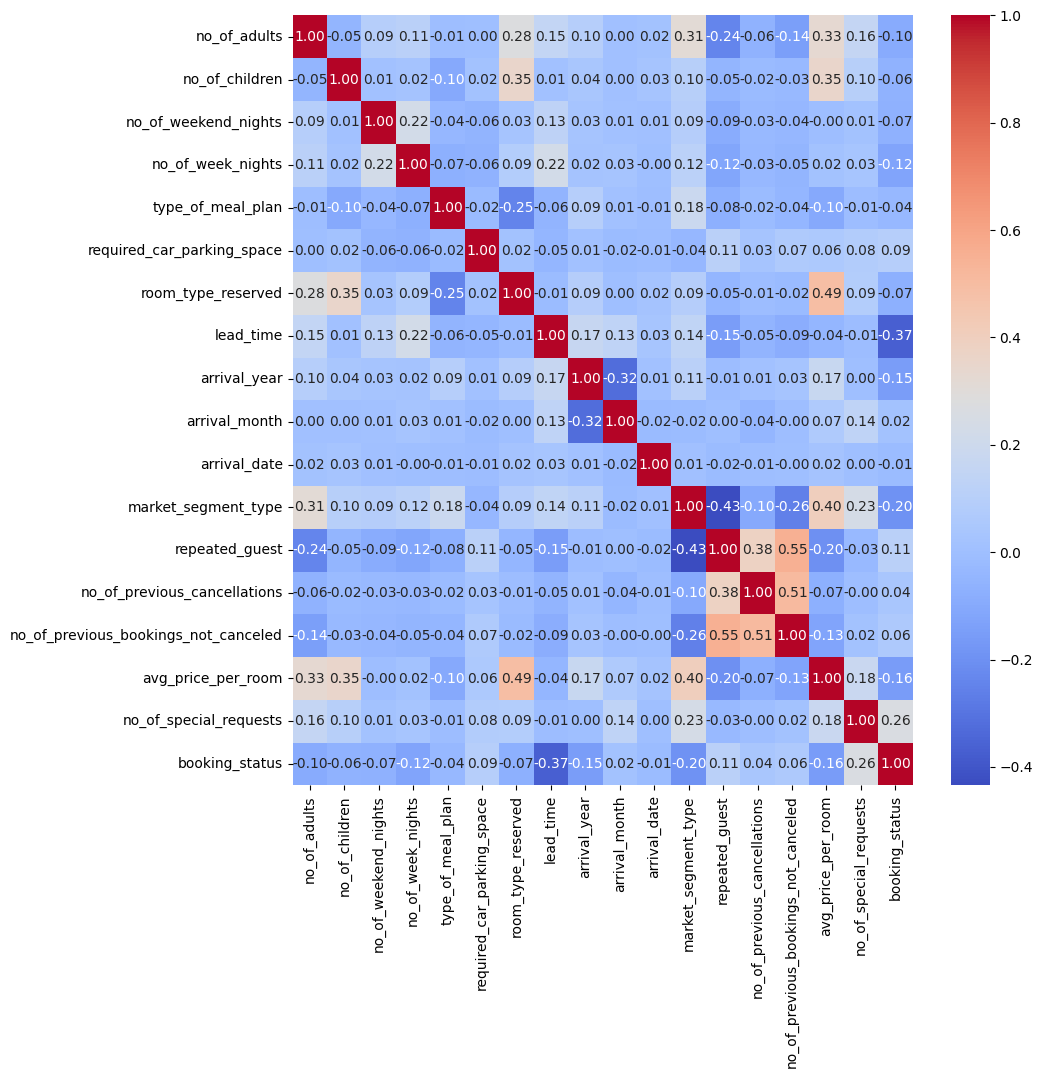

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [91]:
# skewness check
skewness=data.skew()

skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [92]:
## to correct skewness we can use log transformation for highly skewed features

In [93]:
for col in data.columns:
    if skewness[col] > 5:
        data[col] = np.log1p(data[col])

skewness=data.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [94]:
### imbalanced data handling
# we cant do undersamplingt as data will reduce to 50% of original data
# so we will use oversampling technique

#from imblearn.over_sampling import RandomOverSampler
x=data.drop(columns=['booking_status'])
y=data['booking_status']

In [95]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x,y)

In [100]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [102]:
data.shape

(21359, 18)

In [103]:
# so we have to create a new dataframe with the resampled data
balanced_df=pd.DataFrame(x_res,columns=x.columns)
balanced_df['booking_status'] = y_res

In [105]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [106]:
balanced_df.shape

(30462, 18)

In [107]:
df=balanced_df.copy()
df.shape

(30462, 18)

In [109]:
### Feature Selection
# Feature selection can be done using various methods like correlation, feature importance, etc.
# For simplicity, we will use correlation and feature importance from a tree-based model.
from sklearn.ensemble import RandomForestClassifier

In [110]:
x=df.drop(columns=['booking_status'])
y=df['booking_status']

In [116]:
model=RandomForestClassifier(random_state=15)
model.fit(x,y)
feature_importance=model.feature_importances_
feature_importance_df=pd.DataFrame({
    'feature': x.columns,
    'importance' : feature_importance
})
top_feature_importance_df=feature_importance_df.sort_values(by='importance', ascending=False)


In [117]:
top_feature_importance_df

,feature,importance
7,lead_time,0.263265
16,no_of_special_requests,0.189684
15,avg_price_per_room,0.151280
9,arrival_month,0.085927
10,arrival_date,0.084431
11,market_segment_type,0.049990
3,no_of_week_nights,0.044519
2,no_of_weekend_nights,0.029457
4,type_of_meal_plan,0.020768
6,room_type_reserved,0.019378


In [118]:
# taking top 10 features based on feature importance
top_10_features=top_feature_importance_df['feature'].head(10).values
top_10_df=df[top_10_features.tolist()+['booking_status']]
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [120]:
len(top_10_df.columns)

11

In [121]:
df=top_10_df.copy()

In [122]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.1/56.8 MB 8.1 MB/s eta 0:00:07
   -- ------------------------------------- 3.7/56.8 MB 8.2 MB/s eta 0:00:07
   --- ------------------------------------ 5.5/56.8 MB 8.1 MB/s eta 0:00:07
   ---- ----------------------------------- 7.1/56.8 MB 8.0 MB/s eta 0:00:07
   ------ --------------------------------- 8.7/56.8 MB 8.0 MB/s eta 0:00:07
   ------- -------------------------------- 10.5/56.8 MB 8.0 MB/s eta 0:00:06
   -------- ------------------------------- 12.1/56.8 MB 8.0 MB/s eta 0:00:06
   --------- ------------------------------ 13.4/56.8 MB 7.8 MB/s eta 0:00:06
   ---------- ----------------------------- 14.9/56.8 MB 7.4 MB/s eta 0:00:06
   ----------- ---------------------------- 16.0/56.8 MB 7.1 MB/s eta 0:00:06
   ----------- ---------------------------- 17.0/56.8 MB 6.9 MB/s eta 0:00:06
   ------------ --------------------------- 18.1/56.8 MB 6.8 MB/s eta 0:00:06


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   ------------------ --------------------- 26.2/56.8 MB 6.1 MB/s eta 0:00:06
   ------------------- -------------------- 27.3/56.8 MB 6.0 MB/s eta 0:00:05
   ------------------- -------------------- 28.3/56.8 MB 6.0 MB/s eta 0:00:05
   -------------------- ------------------- 29.4/56.8 MB 5.9 MB/s eta 0:00:05
   --------------------- ------------------ 30.4/56.8 MB 5.9 MB/s eta 0:00:05
   ---------------------- ----------------- 31.5/56.8 MB 5.9 MB/s eta 0:00:05
   ----------------------- ---------------- 32.8/56.8 MB 5.8 MB/s eta 0:00:05
   ----------------------- ---------------- 33.8/56.8 MB 5.8 MB/s eta 0:00:04
   ------------------------ --------------- 34.9/56.8 MB 5.7 MB/s eta 0:00:04
   ------------------------- -------------- 35.9/56.8 MB 5.7 MB/s eta 0:00:04
   -------------------------- ------------- 37.0/56.8 MB 5.7 MB/s eta 0:00:04
   -------------------------- ------------- 38.3/56.8 MB 5.6 MB/s eta 0:00:04
   --------------------------- ------------ 39.6/56.8 MB 5.6 MB

## MODEL SELECTION

In [125]:
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [126]:
x=df.drop(columns=['booking_status'])
y=df['booking_status']

In [127]:
classifiers={
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'Gradientboostclasssifier' : GradientBoostingClassifier(random_state=42),
    'Adaboostclasssifier' : AdaBoostClassifier(random_state=42),
    'XGBClassifier' : XGBClassifier(random_state=42),
    'LightGBMClassifier' : LGBMClassifier(random_state=42),
    'Support Vector machine' : SVC(random_state=42),
    'Decisiontreeclassifier' : DecisionTreeClassifier(random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
}


In [131]:
Metrics = {
    'Model' : [],
    'Accuracy':[],
    'Recall' : [],
    'Precision' : [],
    'F1 Score' : []
}

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
for model,classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)

    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)

    Metrics["Model"].append(model)
    Metrics["Accuracy"].append(accuracy)
    Metrics["Recall"].append(recall)
    Metrics["Precision"].append(precision)
    Metrics["F1 Score"].append(f1)

In [130]:
metrics_df=pd.DataFrame(Metrics)
metrics_df

,Accuracy,Recall,Precision,F1 Score
0,0.794518,0.774593,0.809394,0.791611
1,0.891679,0.892508,0.892508,0.892508
2,0.837190,0.864821,0.821473,0.842590
3,0.804202,0.781433,0.821294,0.800868
4,0.870343,0.878176,0.866324,0.872210
5,0.866732,0.890879,0.851494,0.870742
6,0.720335,0.706840,0.729657,0.718068
7,0.840801,0.830619,0.850000,0.840198
8,0.779419,0.675244,0.856612,0.755191
9,0.773346,0.728664,0.803232,0.764133


In [133]:
### TRAIN OUR RANDOM FOREST MODEL
## HYPERTUNING we take randomisearchcv instead og gridsearchcv as it is faster and more efficient for large datasets
from sklearn.model_selection import RandomizedSearchCV

In [134]:
x=df.drop(columns=['booking_status'])
y=df['booking_status']

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [136]:
rf=RandomForestClassifier(random_state=42)

In [ ]:
#rom random import randint

In [149]:
from scipy.stats import randint #  python ranint returns as single number so scipy.stats is used

In [153]:
params_dist={
    'n_estimators' :randint(100,500),
    'max_depth' :randint(10,50),
    'min_samples_split' :randint(2,10),
    'min_samples_leaf' :randint(1,5),
    'bootstrap' : [True, False]
}

In [ ]:
random_search=RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=25,
    cv=5,
    random_state=42,
    verbose=2,
    scoring='accuracy'
)

In [155]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.0s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  10.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.7s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001CBFB1D4710>, 'min_samples_leaf': <scipy.stats....001CBFB19A250>, 'min_samples_split': <scipy.stats....001CBFB19A030>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [156]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [157]:
best_rf_model=random_search.best_estimator_

In [158]:
y_pred=best_rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.8921713441654358
Recall: 0.8970684039087948
Precision: 0.8898222940226171
F1 Score: 0.8934306569343066


In [159]:
### Save the model
import joblib

In [160]:
joblib.dump(best_rf_model,'Random_Forest_Model.pkl')

['Random_Forest_Model.pkl']

In [161]:
loaded_model=joblib.load('Random_Forest_Model.pkl')

In [162]:
x_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [163]:
new_data=np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1) #reshape to match the input shape 
new_prediction=loaded_model.predict(new_data)
print(f"Prediction for new data: {new_prediction}")

Prediction for new data: [1]
